In [27]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [28]:
import awkward as ak

In [29]:
event = up.open("run.root")["myelectrons;1/Events;1"]
print(event.keys())

['numberelectron', 'electron_e', 'electron_pt', 'electron_px', 'electron_py', 'electron_pz', 'electron_eta', 'electron_phi', 'electron_ch', 'electron_iso', 'electron_veto', 'electron_isLoose', 'electron_isMedium', 'electron_isTight', 'electron_dxy', 'electron_dz', 'electron_dxyError', 'electron_dzError', 'electron_ismvaLoose', 'electron_ismvaTight', 'electron_ip3d', 'electron_sip3d']


In [30]:
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
numberelectron       | int32_t                  | AsDtype('>i4')
electron_e           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_pt          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_px          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_py          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_pz          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_eta         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_phi         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_ch          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_iso         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_veto        | std::vector<bool>    

In [31]:
ele_e = event["electron_e"].array() # energy of the electrons
print(ele_e)

[[], [65.5], [4.97], [16.6, 31.7, 8.11], ..., [...], [81.3, 3.95], [11.7], []]


In [32]:
print(ak.num(ele_e)) 

[0, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 2, ..., 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0]


In [33]:
ak.num(ele_e)
print(ele_e[ele_e > 10])


[[], [65.5], [], [16.6, 31.7], [50.2], ..., [29.3, 11.6], [81.3], [11.7], []]


In [35]:
len(ak.num(ele_e))
# len()

100

In [36]:
e_10 = ele_e[ele_e>30]
print(len(e_10))


100


In [37]:
print(ak.sum(ak.num(ele_e >60)))

87


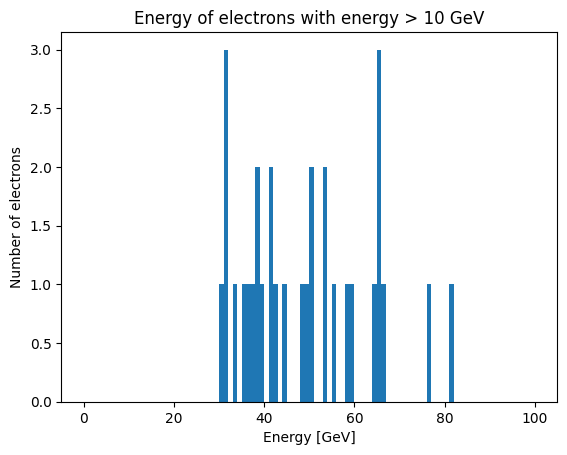

In [38]:
# plotting the histogram
e_10_flat = ak.flatten(e_10)
plt.figure()

plt.hist(e_10_flat, bins=100, range=(0, 100))
plt.xlabel("Energy [GeV]")
plt.ylabel("Number of electrons")
plt.title("Energy of electrons with energy > 10 GeV")
plt.show()

In [39]:
# similarly plotting for px, py, pz
ele_px = event["electron_px"].array()
ele_py = event["electron_py"].array()
ele_pz = event["electron_pz"].array()

ele_px_10 = ele_px[ele_e>30]
ele_py_10 = ele_py[ele_e>30]
ele_pz_10 = ele_pz[ele_e>30]

ele_px_10_flat = ak.flatten(ele_px_10)
ele_py_10_flat = ak.flatten(ele_py_10)
ele_pz_10_flat = ak.flatten(ele_pz_10)



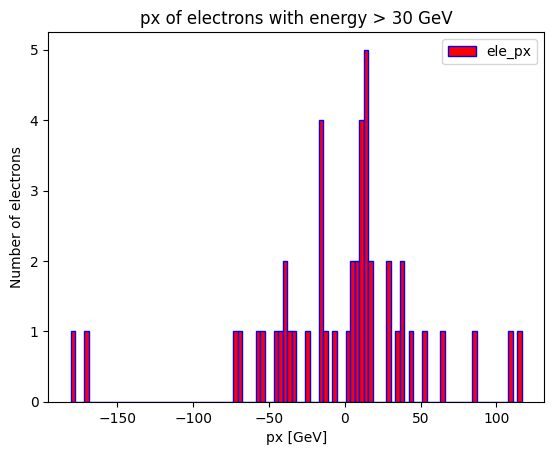

In [50]:
plt.figure()
plt.hist(ele_px_10_flat, bins=100, alpha=1, label="ele_px",edgecolor='blue', color="red")
plt.xlabel("px [GeV]")
plt.ylabel("Number of electrons")
plt.title("px of electrons with energy > 30 GeV")
plt.legend()
plt.show()

In [41]:
# plotting of ele_pt > 30
e_pt = event["electron_pt"].array()
print(e_pt)
print(len(e_pt))
e_pt_30 = e_pt[e_pt>30]
print(e_pt_30)
print(len(e_pt_30))
e_pt_30_flat = ak.flatten(e_pt_30)
print(e_pt_30_flat)

[[], [65.2], [3.27], [13, 6.33, 3.09], ..., [...], [13.7, 2.75], [10.3], []]
100
[[], [65.2], [], [], [45], [], [], [], ..., [36.4], [], [], [], [], [], [], []]
100
[65.2, 45, 107, 44.6, 34.1, 113, 66.1, ..., 181, 60.2, 44.3, 53.9, 88.9, 36.4]


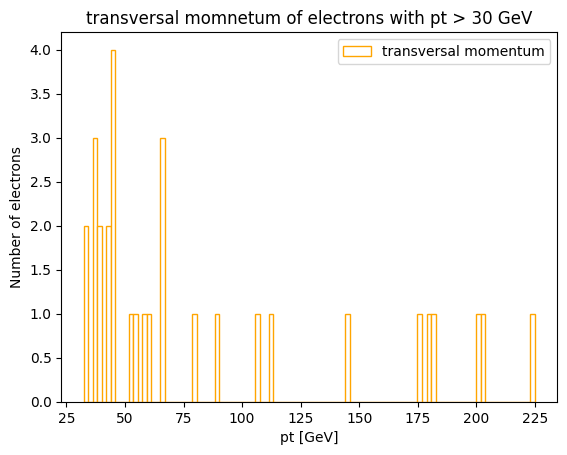

In [42]:
plt.figure()
# plotting with orange colour border over data
plt.hist(e_pt_30_flat, bins=100,edgecolor='orange',color='white',label="transversal momentum" )
plt.xlabel("pt [GeV]")
plt.ylabel("Number of electrons")
plt.title("transversal momnetum of electrons with pt > 30 GeV")
plt.legend()
plt.savefig("e_pt_30.png")

In [43]:
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
numberelectron       | int32_t                  | AsDtype('>i4')
electron_e           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_pt          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_px          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_py          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_pz          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_eta         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_phi         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_ch          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_iso         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
electron_veto        | std::vector<bool>    

In [45]:
events = up.open("run.root")["mymuons;1/Events;1"]
print(events.keys())

['numbermuon', 'muon_e', 'muon_pt', 'muon_px', 'muon_py', 'muon_pz', 'muon_eta', 'muon_phi', 'muon_ch', 'muon_isLoose', 'muon_isMedium', 'muon_isTight', 'muon_isSoft', 'muon_isHighPt', 'muon_dxy', 'muon_dz', 'muon_dxyError', 'muon_dzError', 'muon_pfreliso03all', 'muon_pfreliso04all', 'muon_pfreliso04DBCorr', 'muon_TkIso03', 'muon_jetidx', 'muon_genpartidx', 'muon_ip3d', 'muon_sip3d']


In [46]:
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
numbermuon           | int32_t                  | AsDtype('>i4')
muon_e               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_pt              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_px              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_py              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_pz              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_eta             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_phi             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_ch              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_isLoose         | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_isMedium        | std::vector<int32_t> 

In [51]:
muon_isLoose = events["muon_isLoose"].array()
print(muon_isLoose)
print(len(muon_isLoose))

[[], [1, 1], [1], [], [1], [], [1, 1], [], ..., [], [0], [], [], [], [1], []]
100


In [52]:
# flattening the array
muon_isLoose_flat = ak.flatten(muon_isLoose)

In [57]:
count = 0
for i in range(len(muon_isLoose_flat)):
    if muon_isLoose_flat[i] == 1:
        count +=1
    else:
        continue

print(count)

66


In [68]:
# plotting the muon_pt
muon_pt = events["muon_pt"].array()
print(muon_pt)
print(len(muon_pt))
muon_10 = muon_pt[muon_pt<10]
print(muon_10)
print(ak.sum(ak.num(muon_10)))
muon_10_flat = ak.flatten(muon_10)
print(muon_10_flat)
print(len(muon_10_flat))

[[], [1.42, 0.893], [0.922], [], [2.44], [], ..., [10], [], [], [], [1.24], []]
100
[[], [1.42, 0.893], [0.922], [], [2.44], [], ..., [], [], [], [], [1.24], []]
97
[1.42, 0.893, 0.922, 2.44, 1.91, 0.934, ..., 8.51, 7.31, 0.806, 1.32, 1.24]
97


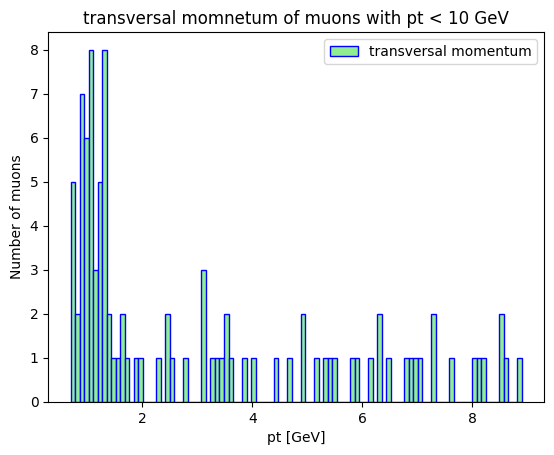

In [72]:
# plotting the histogram
plt.figure()
plt.hist(muon_10_flat, bins=100, edgecolor='blue', color='lightgreen', label="transversal momentum")
plt.xlabel("pt [GeV]")
plt.ylabel("Number of muons")
plt.title("transversal momnetum of muons with pt < 10 GeV")
plt.legend()
plt.show()

(0.6615724363913299, 0.7022340407229084, 3.418080477447504)


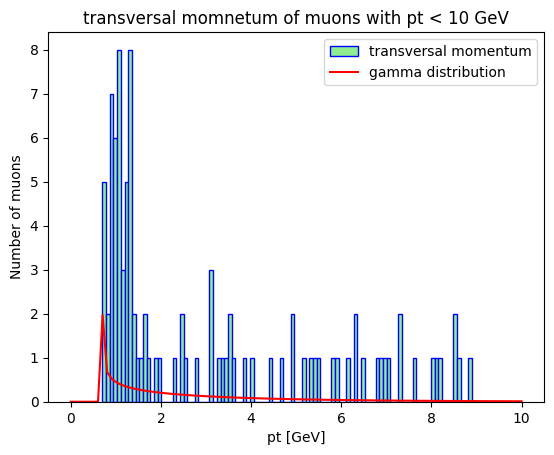

In [87]:
# plotting the histogram
plt.figure()
plt.hist(muon_10_flat, bins=100, edgecolor='blue', color='lightgreen', label="transversal momentum")
# doing curve fitting by gamma distribution
from scipy.stats import gamma
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# fit the gamma distribution
param = gamma.fit(muon_10_flat)
print(param)
x = np.linspace(0, 10, 100)
pdf_fitted = gamma.pdf(x, *param)
plt.plot(x, pdf_fitted, label="gamma distribution", color="red")

plt.xlabel("pt [GeV]")
plt.ylabel("Number of muons")
plt.title("transversal momnetum of muons with pt < 10 GeV")
plt.legend()
plt.savefig("muon_pt_10.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.6615724363913299 0.7022340407229084 3.418080477447504


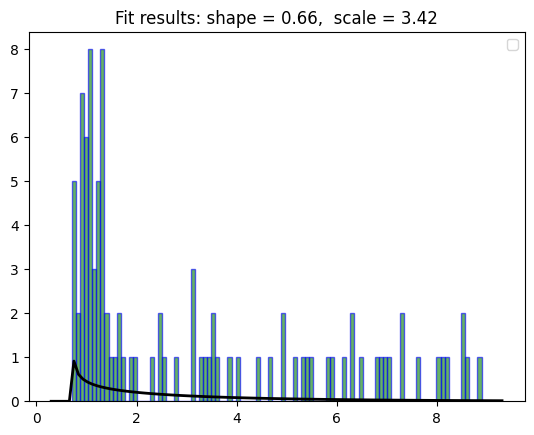